<a href="https://colab.research.google.com/github/shintafiaa/Teaching-Assistant-Technobar/blob/main/Technobar/6_XGBoost_data_melb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learn on how to build and optimize model with **gradient boosting.**

#Introduction
By definition, **ensemble methods** combine the predictions of several models (e.g., several trees, in the case of random forest).

Now, we'll learn about another ensemble method called gradient boosting.

#Difference of Decision Tree, Random Forest, and XGBoost

1. Decision Tree:
A decision tree is a simple and interpretable model that recursively splits the data into subsets based on the feature values. It forms a tree-like structure where each internal node represents a test on a feature, each branch represents the outcome of that test, and each leaf node represents the final prediction. The decision tree makes binary decisions at each node to split the data. It is prone to overfitting, especially when the tree becomes deep, capturing noise and leading to poor generalization on unseen data.

2. Random Forest:
Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions through voting (for classification) or averaging (for regression). Each decision tree is trained on a random subset of the data (bootstrap sample) and a random subset of the features. This randomness reduces overfitting and increases the model's ability to generalize to new data.

3. XGBoost (Extreme Gradient Boosting):
XGBoost is an optimized implementation of the Gradient Boosting algorithm. It creates an ensemble of weak learners (usually shallow decision trees) sequentially, where each new model corrects the errors made by the previous one. XGBoost uses a gradient-based optimization algorithm to minimize a loss function while adding new trees to the ensemble. It also includes regularization terms to control overfitting and speed up the training process. XGBoost is known for its high performance, scalability, and efficiency, making it popular in various machine learning competitions and real-world applications.
**XGBoost** is an implementation of gradient boosting with several additional features focused on perfmance and speed. The final result of an XGBoost model is a weighted sum of the predictions made by all the individual trees in the sequence. The contribution of each tree is adjusted during training based on how well it reduces the overall error.


Note:

* Regularization (penyederhanaan): XGBoost introduces regularization terms to control overfitting during the training process. Regularization helps prevent the model from becoming too complex and ensures better generalization to unseen data.


#Gradient Boosting

**Gradient boosting** is a method that goes through cycles to iteratively add models into an ensemble (setelan).

It begins by initializing the ensemble with a single model, whose predictions can be pretty naive. (Even if its predictions are wildly inaccurate, subsequent (kemudian) additions to the ensemble will address those errors.)

Then, we start the cycle:
1. First, we use the current ensemble to generate predictions for each observation in the dataset. To make a prediction, we **add the predictions from all models** in the ensemble.
2. These predictions are used to calculate a loss function (like mean squared error, for instance).
3. Then, we use the loss function to fit a new model that will be added to the ensemble. Specifically, we determine model parameters so that adding this new model to the ensemble will reduce the loss.
4. Finally, we add the new model to ensemble, and ...
5. Repeat!

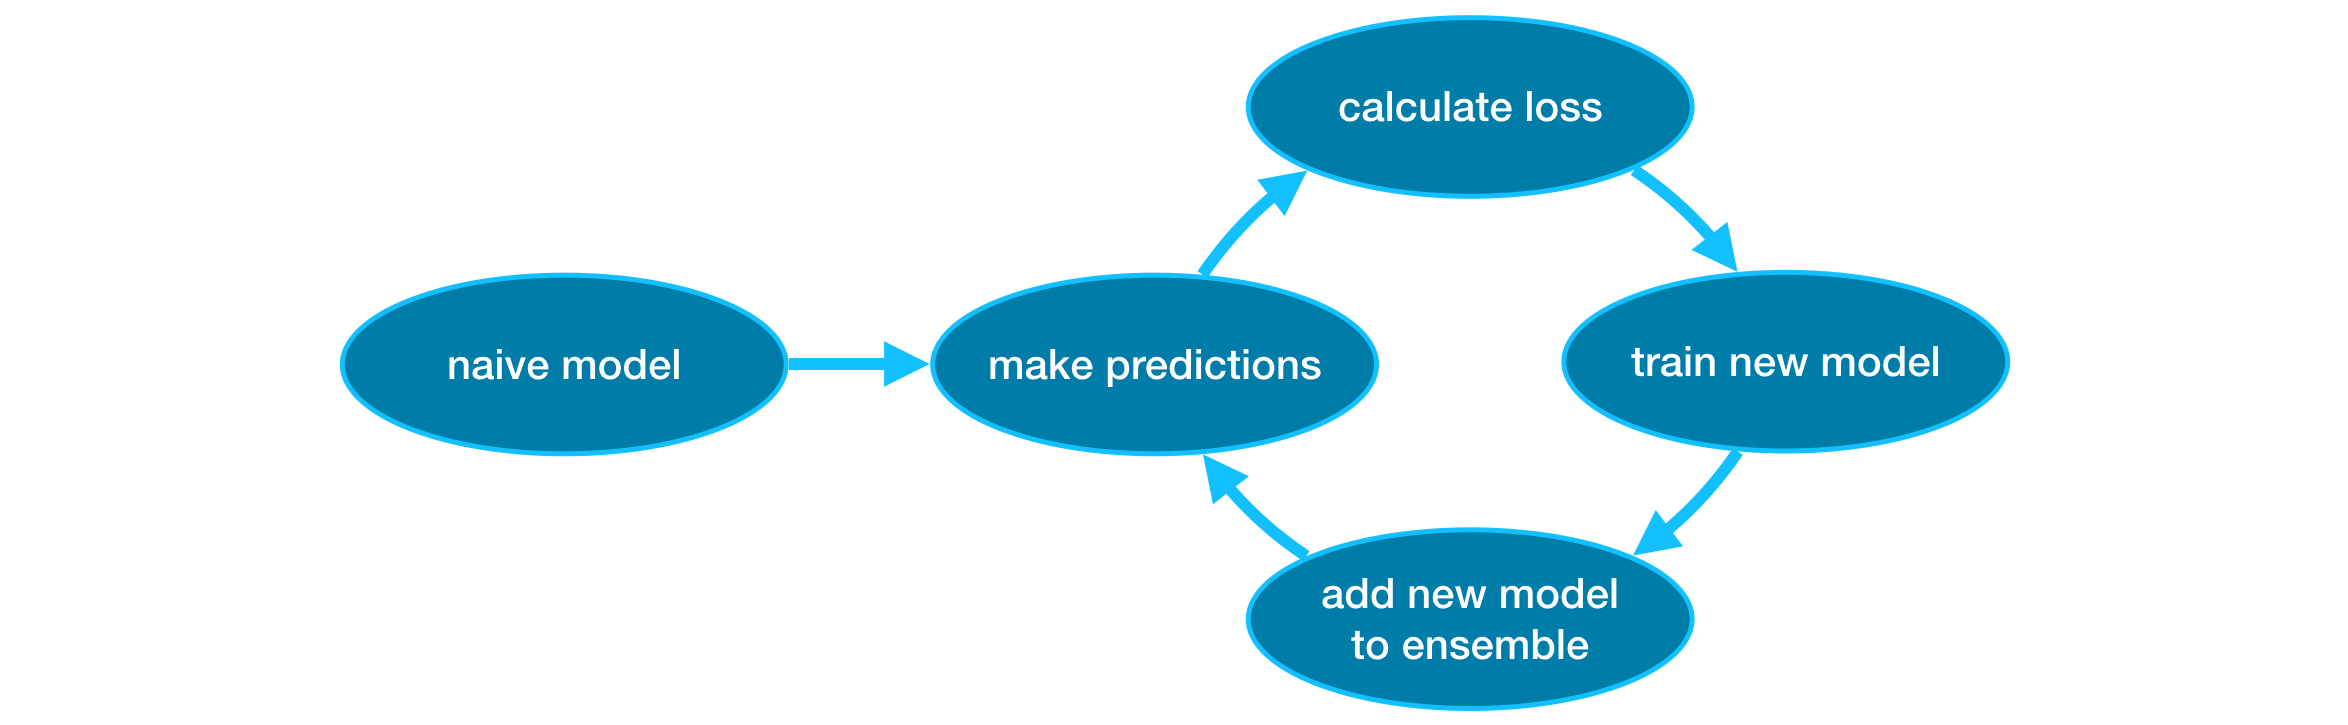

#Example
We begin by loading the training and validation data in X_train, X_valid, y_train, y_valid.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Dataset/tugasxgboost2.csv',delimiter=';')
df.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
# select a subset of predictors and target
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = df['quality']


**Prompt:**

Write a code cell to split the data into training and validation

In [5]:
# split the data into training and validation

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Display the shapes of the training and validation sets
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((3918, 11), (980, 11), (3918,), (980,))

In the next code cell, we import the scikit-learn API for XGBoost (`xgboost.XGBRegressor`). As you'll see in the output, the `XGBRegressor` class has many tunable parameters.


In [6]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Create an XGBoost regressor
my_model = xgb.XGBRegressor(random_state=0)

# Fit the model to the training data
my_model.fit(X_train, y_train)

# Make predictions on the validation set
predictions = my_model.predict(X_valid)

# Calculate the mean absolute error
mae = mean_absolute_error(predictions, y_valid)

# Print the mean absolute error
print("Mean Absolute Error: " + str(mae))


Mean Absolute Error: 0.5087531615276726


We also make predictions and evaluate the model.

In [7]:
# Create an XGBoost regressor with 500 estimators
my_model_2 = XGBRegressor(n_estimators=500, random_state=0)

# Fit the model to the training data
my_model_2.fit(X_train, y_train)

# Make predictions on the validation set
predictions_2 = my_model_2.predict(X_valid)

# Calculate the mean absolute error
mae_2 = mean_absolute_error(predictions_2, y_valid)

# Print the mean absolute error
print("Mean Absolute Error (500 estimators): " + str(mae_2))


Mean Absolute Error (500 estimators): 0.472180032243534


In [8]:
# Create an XGBoost regressor with a custom learning rate, 90 estimators, and early stopping
my_model_3 = XGBRegressor(n_estimators=90, learning_rate=0.1, verbosity = 1, random_state=0, early_stopping_rounds=10)

# Fit the model to the training data with early stopping
my_model_3.fit(X_train, y_train,eval_set=[(X_valid, y_valid)],verbose = True)

# Make predictions on the validation set
predictions_3 = my_model_3.predict(X_valid)

# Calculate the mean absolute error
mae_3 = mean_absolute_error(predictions_3, y_valid)

# Print the mean absolute error
print("Mean Absolute Error (90 estimators, custom learning rate, early stopping): " + str(mae_3))

[0]	validation_0-rmse:0.91552
[1]	validation_0-rmse:0.89171
[2]	validation_0-rmse:0.87219
[3]	validation_0-rmse:0.85601
[4]	validation_0-rmse:0.84247
[5]	validation_0-rmse:0.82942
[6]	validation_0-rmse:0.81849
[7]	validation_0-rmse:0.80803
[8]	validation_0-rmse:0.79906
[9]	validation_0-rmse:0.79146
[10]	validation_0-rmse:0.78505
[11]	validation_0-rmse:0.77976
[12]	validation_0-rmse:0.77549
[13]	validation_0-rmse:0.77293
[14]	validation_0-rmse:0.76824
[15]	validation_0-rmse:0.76408
[16]	validation_0-rmse:0.75951
[17]	validation_0-rmse:0.75665
[18]	validation_0-rmse:0.75381
[19]	validation_0-rmse:0.75073
[20]	validation_0-rmse:0.74885
[21]	validation_0-rmse:0.74732
[22]	validation_0-rmse:0.74488
[23]	validation_0-rmse:0.74241
[24]	validation_0-rmse:0.74162
[25]	validation_0-rmse:0.74010
[26]	validation_0-rmse:0.73940
[27]	validation_0-rmse:0.73830
[28]	validation_0-rmse:0.73705
[29]	validation_0-rmse:0.73593
[30]	validation_0-rmse:0.73514
[31]	validation_0-rmse:0.73453
[32]	validation_0-

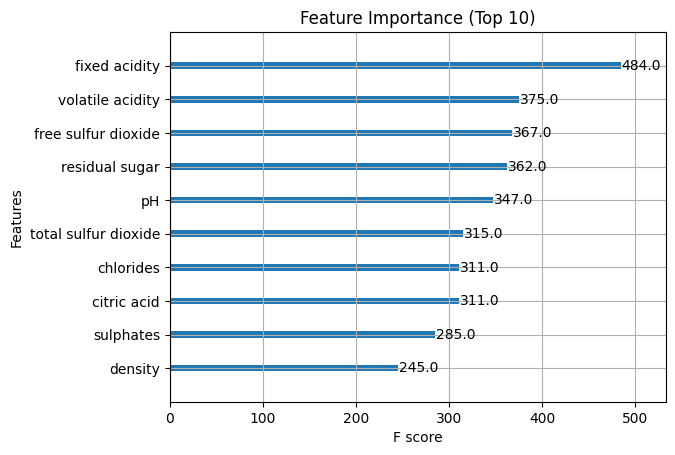

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance # Import the plot_importance function

# Plot feature importance
plot_importance(my_model_3, importance_type='weight', max_num_features=10)
plt.title("Feature Importance (Top 10)")
plt.show()

<Figure size 2000x1000 with 0 Axes>

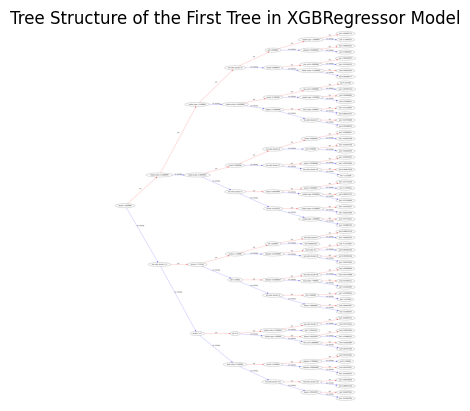

In [10]:
# Plot the structure of the first tree in the model
plt.figure(figsize=(20, 10))
xgb.plot_tree(my_model_3, num_trees=0, rankdir='LR')
plt.title("Tree Structure of the First Tree in XGBRegressor Model")
plt.show()

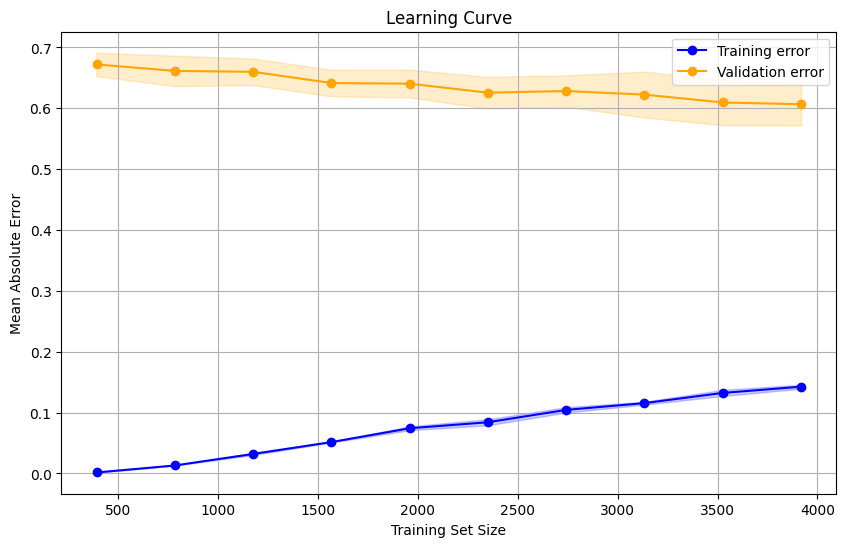

In [11]:
from sklearn.model_selection import learning_curve

# Generate the learning curve
train_sizes, train_scores, valid_scores = learning_curve(
    my_model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_absolute_error', n_jobs=-1,
    fit_params={'eval_set': [(X_valid, y_valid)]}  # Pass validation data here
)

# Calculate the mean and standard deviation for training and validation scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = -np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training error")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="orange", label="Validation error")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.2, color="orange")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Absolute Error")
plt.legend(loc="best")
plt.grid()
plt.show()

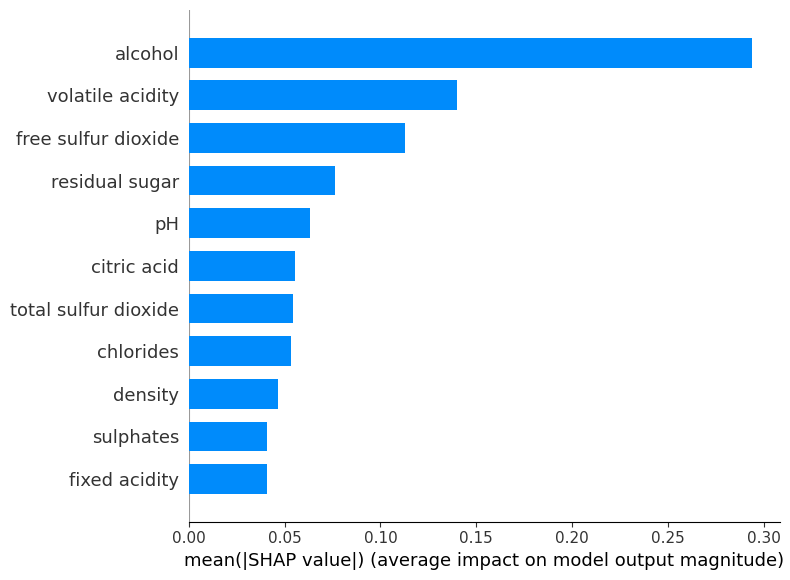

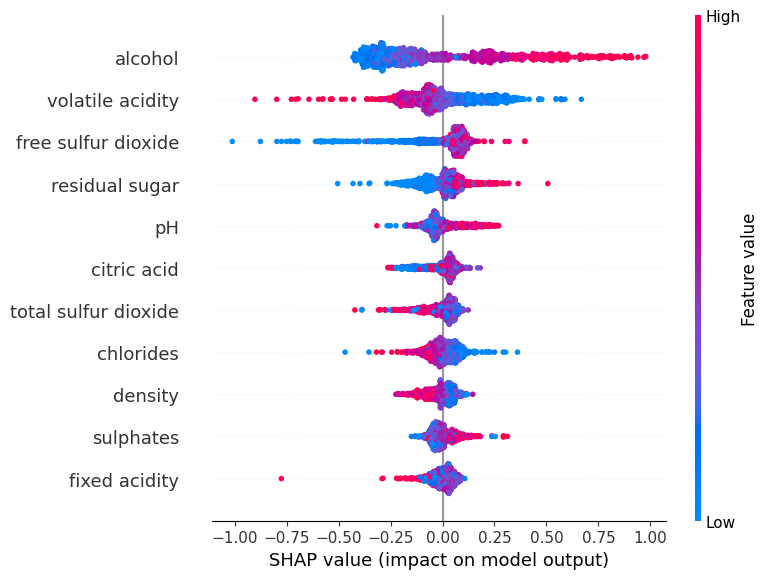

In [12]:
import shap

# Initialize the SHAP TreeExplainer
explainer = shap.TreeExplainer(my_model_3)

# Calculate SHAP values for the validation set
shap_values = explainer.shap_values(X_valid)

# Plot SHAP summary plot (bar plot)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_valid, plot_type="bar")
plt.show()

# Plot SHAP summary plot (detailed distribution)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_valid)
plt.show()

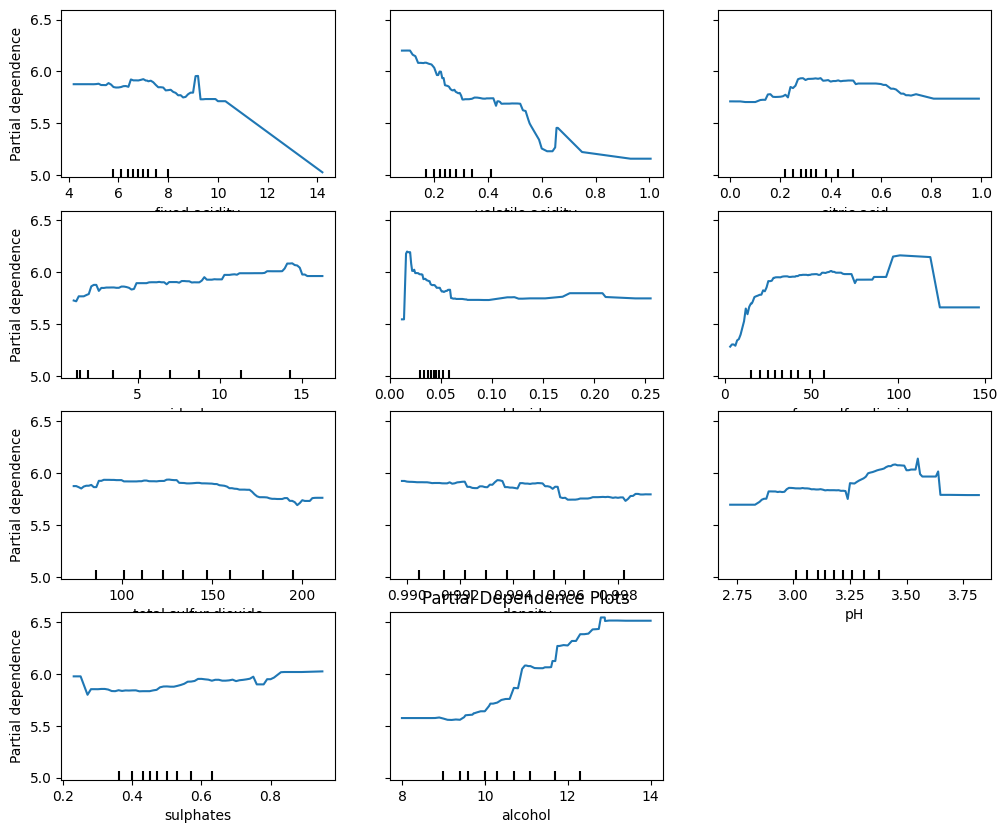

In [13]:
from sklearn.inspection import PartialDependenceDisplay

# Create the partial dependence plot
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
fig, ax = plt.subplots(figsize=(12, 10))
PartialDependenceDisplay.from_estimator(my_model_3, X_valid, features=features, ax=ax)
plt.title("Partial Dependence Plots")
plt.show()